In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
train_loginfo = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_LogInfo_3_1_Training_Set.csv", encoding='gbk')
train_master = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_Training_Master_GBK_3_1_Training_Set.csv", encoding='gbk')
train_userinfo = pd.read_csv("./PPD-First-Round-Data-Update/Training Set/PPD_Userupdate_Info_3_1_Training_Set.csv", encoding='gbk')
train_loginfo2 = pd.read_csv("./PPD-Second-Round-Data(en)/second round newly added data/LogInfo_9w_3_2.csv", encoding='gbk')
train_master2 = pd.read_csv("./PPD-Second-Round-Data(en)/second round newly added data/Kesci_Master_9w_gbk_3_2.csv", encoding='gbk')
train_userinfo2 = pd.read_csv("./PPD-Second-Round-Data(en)/second round newly added data/Userupdate_Info_9w_3_2.csv", encoding='gbk')
train_master = pd.concat([train_master, train_master2])
train_loginfo = pd.concat([train_loginfo, train_loginfo2])
train_userinfo = pd.concat([train_userinfo, train_userinfo2])

## Outlier

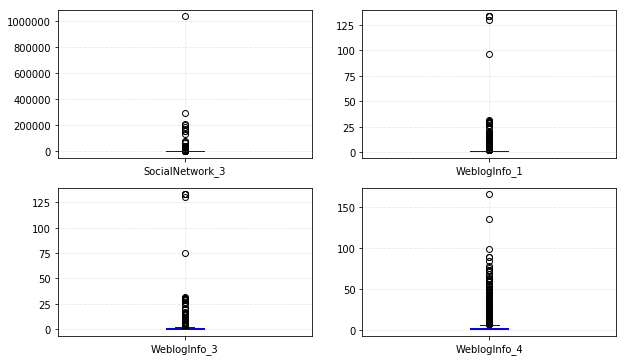

In [3]:
# plt.style.use('bmh')
plt.figure(figsize=(10, 6))

plt.subplot(221)
train_master['SocialNetwork_3'].plot.box(color='blue')
plt.grid(linestyle="--", alpha=0.3)

plt.subplot(222)
train_master['WeblogInfo_1'].plot.box(color='blue')
plt.grid(linestyle="--", alpha=0.3)

plt.subplot(223)
train_master['WeblogInfo_3'].plot.box(color='blue')
plt.grid(linestyle="--", alpha=0.3)

plt.subplot(224)
train_master['WeblogInfo_4'].plot.box(color='blue')
plt.grid(linestyle="--", alpha=0.3)

plt.savefig('outlier')
plt.show()

## Number of login vs. target

In [4]:
train_loginfo['Listinginfo1'] = train_loginfo['Listinginfo1'].astype('datetime64')
train_loginfo['LogInfo3'] = train_loginfo['LogInfo3'].astype('datetime64')

In [5]:
number_of_train_loginfo_df = train_loginfo['Idx'].value_counts().to_frame(name="number_of_train_loginfo")
number_of_train_loginfo_df.index.name = 'Idx'
number_of_train_loginfo_df.head()

,number_of_train_loginfo
Idx,
86155,1959
44451,1957
60899,1869
76291,1292
12671,1262


In [9]:
dfs = [train_master, number_of_train_loginfo_df]
train_df = reduce(lambda left,right: pd.merge(left,right,on='Idx',how='outer'), dfs)
train_df.head()

,Idx,UserInfo_1,UserInfo_2,UserInfo_3,UserInfo_4,WeblogInfo_1,WeblogInfo_2,WeblogInfo_3,WeblogInfo_4,WeblogInfo_5,...,SocialNetwork_11,SocialNetwork_12,SocialNetwork_13,SocialNetwork_14,SocialNetwork_15,SocialNetwork_16,SocialNetwork_17,target,ListingInfo,number_of_train_loginfo
0,10001,1.0,深圳,4.0,深圳,NaN,1.0,NaN,1.0,1.0,...,-1,0,0,0,0,0,1,0,2014/3/5,19.0
1,10002,1.0,温州,4.0,温州,NaN,0.0,NaN,1.0,1.0,...,-1,0,0,0,0,0,2,0,2014/2/26,24.0
2,10003,1.0,宜昌,3.0,宜昌,NaN,0.0,NaN,2.0,2.0,...,-1,-1,1,0,0,0,0,0,2014/2/28,14.0
3,10006,4.0,南平,1.0,南平,NaN,NaN,NaN,NaN,NaN,...,-1,-1,0,0,0,0,0,0,2014/2/25,7.0
4,10007,5.0,辽阳,1.0,辽阳,NaN,0.0,NaN,1.0,1.0,...,-1,-1,0,0,0,0,0,0,2014/2/27,5.0


In [20]:
num_log_target_df = train_df[['target','number_of_train_loginfo']]

In [32]:
num_log_target_df['number_of_train_loginfo'].nunique()

298

In [33]:
num_log_target_df.head()

,target,number_of_train_loginfo
0,0,19.0
1,0,24.0
2,0,14.0
3,0,7.0
4,0,5.0


In [73]:
log_default_df = num_log_target_df.groupby('number_of_train_loginfo').sum().reset_index().rename(columns={"number_of_train_loginfo": "number_of_train_loginfo", "target": "#default"})
log_default_df.head()

,number_of_train_loginfo,#default
0,1.0,6
1,2.0,5
2,3.0,5
3,4.0,7
4,5.0,12


In [74]:
log_count_df = num_log_target_df.groupby('number_of_train_loginfo').count().reset_index().rename(columns={"number_of_train_loginfo": "number_of_train_loginfo", "target": "count"})
log_count_df.head()

,number_of_train_loginfo,count
0,1.0,91
1,2.0,64
2,3.0,84
3,4.0,94
4,5.0,181


In [110]:
login_num_default_df = num_log_target_df.groupby('number_of_train_loginfo').sum()
login_num_count_df = num_log_target_df.groupby('number_of_train_loginfo').count()
login_default_rate_df = (login_num_default_df/login_num_count_df)
tmp = login_default_rate_df.sort_values('target').sort_values('number_of_train_loginfo').reset_index()
dfs = [tmp, log_default_df, log_count_df]
login_df = reduce(lambda left,right: pd.merge(left,right,on='number_of_train_loginfo',how='outer'), dfs)
login_df.head()

,number_of_train_loginfo,target,#default,count
0,1.0,0.065934,6,91
1,2.0,0.078125,5,64
2,3.0,0.059524,5,84
3,4.0,0.074468,7,94
4,5.0,0.066298,12,181


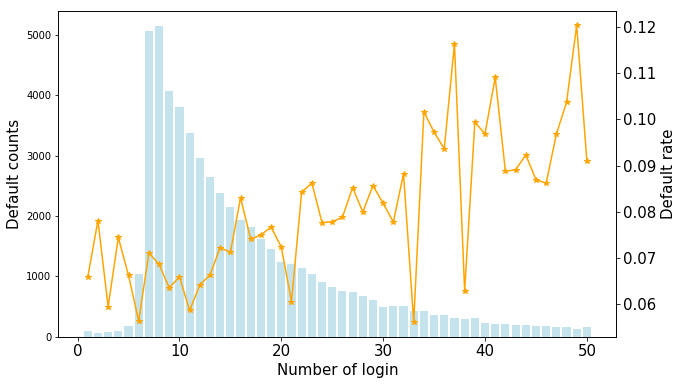

In [133]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.bar(login_df.iloc[:50]['number_of_train_loginfo'], login_df.iloc[:50]['count'],alpha=.7,color='lightblue')
ax1.set_ylabel('Default counts',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
ax1.set_xlabel('Number of login',fontsize='15')

ax2 = ax1.twinx()
ax2.plot(login_df.iloc[:50]['number_of_train_loginfo'], login_df.iloc[:50]['target'], 'orange',marker='*')
ax2.set_ylabel('Default rate',fontsize='15')
plt.yticks(fontsize=15)

plt.show()

## Number of User update vs. target

In [118]:
train_userinfo.head()

,Idx,ListingInfo1,UserupdateInfo1,UserupdateInfo2
0,10001,2014/03/05,_EducationId,2014/02/20
1,10001,2014/03/05,_HasBuyCar,2014/02/20
2,10001,2014/03/05,_LastUpdateDate,2014/02/20
3,10001,2014/03/05,_MarriageStatusId,2014/02/20
4,10001,2014/03/05,_MobilePhone,2014/02/20


In [119]:
train_userinfo['ListingInfo1'] = train_userinfo['ListingInfo1'].astype('datetime64')
train_userinfo['UserupdateInfo2'] = train_userinfo['UserupdateInfo2'].astype('datetime64')

In [120]:
number_of_train_userinfo_df = train_userinfo['Idx'].value_counts().to_frame(name="number_of_train_userinfo")
number_of_train_userinfo_df.index.name = 'Idx'
number_of_train_userinfo_df.head()

,number_of_train_userinfo
Idx,
10648,156
27749,99
2192,93
1533,89
27419,88


In [123]:
dfs = [train_master, number_of_train_userinfo_df]
tmp = reduce(lambda left,right: pd.merge(left,right,on='Idx',how='outer'), dfs)
user_target_df = tmp[['target','number_of_train_userinfo']]
user_target_df.head()

,target,number_of_train_userinfo
0,0,11.0
1,0,21.0
2,0,10.0
3,0,10.0
4,0,10.0


In [124]:
user_default_df = user_target_df.groupby('number_of_train_userinfo').sum().reset_index().rename(columns={"number_of_train_userinfo": "number_of_train_userinfo", "target": "#default"})
user_default_df.head()

,number_of_train_userinfo,#default
0,1.0,0
1,2.0,305
2,3.0,13
3,4.0,12
4,5.0,6


In [128]:
user_count_df = user_target_df.groupby('number_of_train_userinfo').count().reset_index().rename(columns={"number_of_train_userinfo": "number_of_train_userinfo", "target": "count"})
user_count_df.head()

,number_of_train_userinfo,count
0,1.0,1
1,2.0,4457
2,3.0,180
3,4.0,197
4,5.0,124


In [129]:
user_num_default_df = user_target_df.groupby('number_of_train_userinfo').sum()
user_num_count_df = user_target_df.groupby('number_of_train_userinfo').count()
user_default_rate_df = (user_num_default_df/user_num_count_df)
tmp = user_default_rate_df.sort_values('target').sort_values('number_of_train_userinfo').reset_index()
dfs = [tmp, user_default_df, user_count_df]
user_df = reduce(lambda left,right: pd.merge(left,right,on='number_of_train_userinfo',how='outer'), dfs)
user_df.head()

,number_of_train_userinfo,target,#default,count
0,1.0,0.000000,0,1
1,2.0,0.068432,305,4457
2,3.0,0.072222,13,180
3,4.0,0.060914,12,197
4,5.0,0.048387,6,124


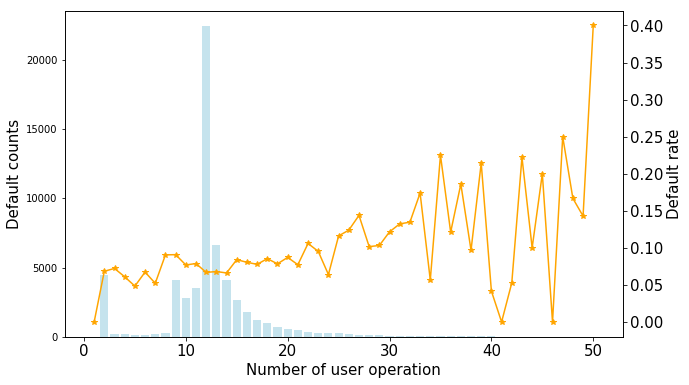

In [132]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(111)
ax1.bar(user_df.iloc[:50]['number_of_train_userinfo'], user_df.iloc[:50]['count'],alpha=.7,color='lightblue')
ax1.set_ylabel('Default counts',fontsize='15') 
plt.yticks(fontsize=10)
plt.xticks(fontsize=15)
ax1.set_xlabel('Number of user operation',fontsize='15')

ax2 = ax1.twinx()
ax2.plot(user_df.iloc[:50]['number_of_train_userinfo'], user_df.iloc[:50]['target'], 'orange',marker='*')
ax2.set_ylabel('Default rate',fontsize='15')
plt.yticks(fontsize=15)


plt.show()